# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization

---

## 1. Import packages

In [65]:
# Import the warnings module
import warnings  

# Suppress FutureWarnings to keep the output clean
warnings.filterwarnings("ignore", category=FutureWarning)  

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## 2. Loading data with Pandas

Loading `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python

In [6]:
client_df = pd.read_csv("Data/Client_Data.csv")
price_df = pd.read_csv("Data/Price_Data.csv")

Inspecting the first 5 rows of both dataframes to see what the data looks like

In [8]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


With the client data, there is a mix of numeric and categorical data

In [9]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


With the price data, it is purely numeric data but we can see a lot of zeros

---

## 3. Descriptive statistics of data

### Data types

Understanding the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

In [10]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [11]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


The `datetime` related columns are not currently in datetime format.

### Statistics

Statistical Analysis of the datasets

In [12]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


The describe method gives us a lot of information about the client data. The key point to take away from this is that we have highly skewed data, as exhibited by the percentile values.

In [13]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Overall the price data looks good.

---

## 3. Data visualization

Now let's dive a bit deeper into the dataframes

In [28]:
import matplotlib.pyplot as plt

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper left", colors=["#1f77b4", "#ff7f0e"]):
    """
    Plots a stacked bar chart with annotations for better readability.
    
    Parameters:
    dataframe : pandas.DataFrame
        The DataFrame containing the data to plot.
    title_ : str
        The title of the plot.
    size_ : tuple, optional (default=(18, 10))
        The figure size.
    rot_ : int, optional (default=0)
        The rotation angle for x-axis labels.
    legend_ : str, optional (default="upper right")
        The position of the legend.
    """
    # Create a stacked bar plot
    ax = dataframe.plot(
        kind="bar",  # Specify bar plot type
        stacked=True,  # Stack bars on top of each other
        figsize=size_,  # Set figure size
        rot=rot_,  # Rotate x-axis labels
        title=title_  # Set title
    )
    
    # Add annotations to the stacked bars
    annotate_stacked_bars(ax, textsize=14)
    
    # Rename legend labels for clarity
    plt.legend(["Retention", "Churn"], loc=legend_)
    
    # Label y-axis
    plt.ylabel("Company base (%)")
    
    # Show the plot
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=14):
    """
    Adds value annotations to stacked bar chart bars.
    
    Parameters:
    ax : matplotlib.axes.Axes
        The axes object to annotate.
    pad : float, optional (default=0.99)
        Padding factor for adjusting text position.
    colour : str, optional (default="white")
        Color of the annotation text.
    textsize : int, optional (default=13)
        Font size of the annotation text.
    """
    
    # Iterate over each bar in the plot
    for p in ax.patches:
        
        # Calculate the height value to annotate
        value = str(round(p.get_height(), 1))
        
        # Skip annotation for bars with zero height
        if value == '0.0':
            continue
        
        # Place annotation text at the center of each bar
        ax.annotate(
            value,  # Text to display
            ((p.get_x() + p.get_width() / 2) * pad - 0.05,  # X-coordinate of text
             (p.get_y() + p.get_height() / 2) * pad),  # Y-coordinate of text
            color=colour,  # Text color
            size=textsize # Text font size
        )

### Churn

In [29]:
# Extract the 'id' and 'churn' columns from the client data
df_churn = client_df[['id', 'churn']]
# Rename the columns for better readability
df_churn.columns = ['Companies', 'Churn_Status']

# Group by 'Churn_Status' and count the number of companies in each category
churn_total = df_churn.groupby('Churn_Status').count()

# Calculate the percentage distribution of churn status
churn_percentage = (churn_total / churn_total.sum()) * 100

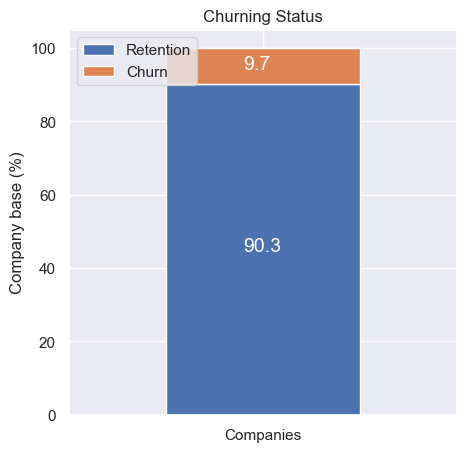

In [32]:
# Transpose the churn percentage data for better visualization
# This ensures the churn categories (Retention/Churn) are on the x-axis
churn_percentage_t = churn_percentage.transpose()

# Plot the stacked bar chart for churn status
# The figure size is set to (5,5) and the legend is placed at the lower right
plot_stacked_bars(churn_percentage_t, "Churning Status", size_=(5, 5), legend_="upper left", colors=["#2ca02c", "#d62728"])

About 10% of the total customers have churned. (This sounds about right)

### Sales channel

In [35]:
# Extract relevant columns: 'id' (company ID), 'channel_sales' (sales channel), and 'churn' (churn status)
channel = client_df[['id', 'channel_sales', 'churn']]

# Group by sales channel and churn status, then count the number of companies in each group
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count()

# Reshape the data: move churn status from index to columns, filling missing values with 0
channel = channel.unstack(level=1).fillna(0)

# Convert raw counts into percentages: compute churn distribution per sales channel
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100)

# Sort sales channels by churn percentage (column with churn=1) in descending order
channel_churn = channel_churn.sort_values(by=[1], ascending=False)

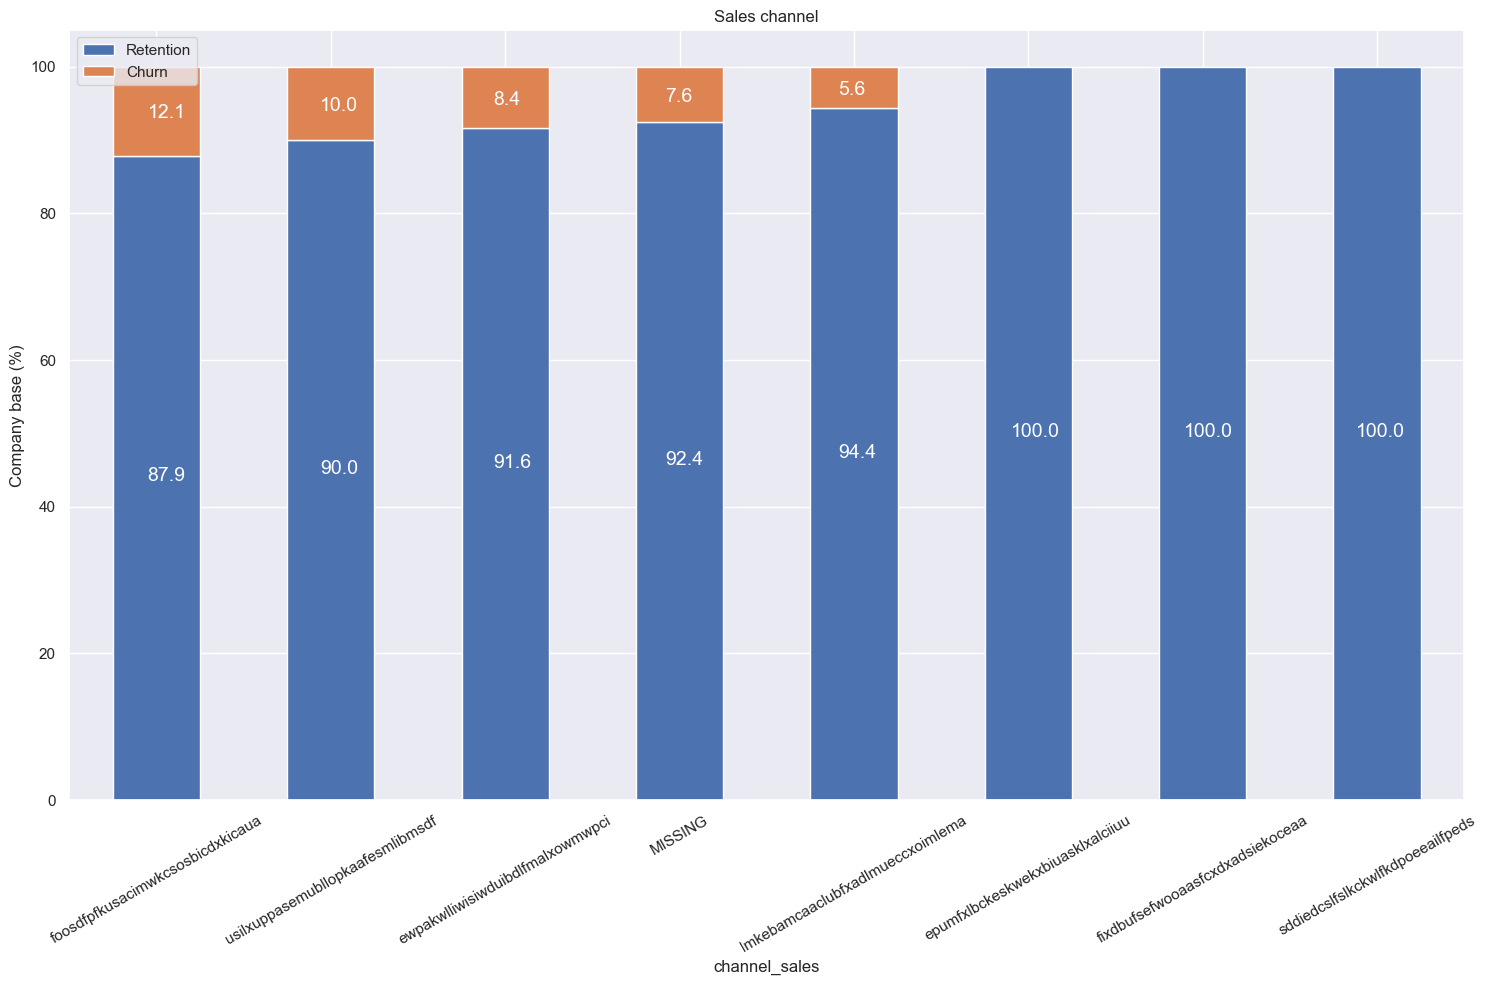

In [36]:
# Plot stacked bar chart for churn percentage per sales channel
plot_stacked_bars(
    channel_churn,    # Data to visualize
    "Sales channel",  # Chart title
    rot_=30           # Rotate x-axis labels for better readability
)

Interestingly, the churning customers are distributed over 5 different values for `channel_sales`. As well as this, the value of `MISSING` has a churn rate of 7.6%. `MISSING` indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

### Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [37]:
# Selecting relevant consumption-related features along with churn status
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plots the distribution of a given variable in a stacked histogram, 
    distinguishing between churned and retained companies.
    
    Parameters:
    dataframe (pd.DataFrame): The dataset containing the variable.
    column (str): The name of the column to be plotted.
    ax (matplotlib.axes.Axes): The axes on which the plot will be drawn.
    bins_ (int): Number of bins for the histogram (default: 50).
    """

    # Create a temporary DataFrame with separate columns for retention and churn
    temp = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"] == 0][column],  # Retained companies
        "Churn": dataframe[dataframe["churn"] == 1][column]       # Churned companies
    })

    # Plot the histogram with stacked bars
    temp[["Retention", "Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)

    # Set the x-axis label to the column name
    ax.set_xlabel(column)

    # Format x-axis labels to use plain style (avoid scientific notation)
    ax.ticklabel_format(style='plain', axis='x')

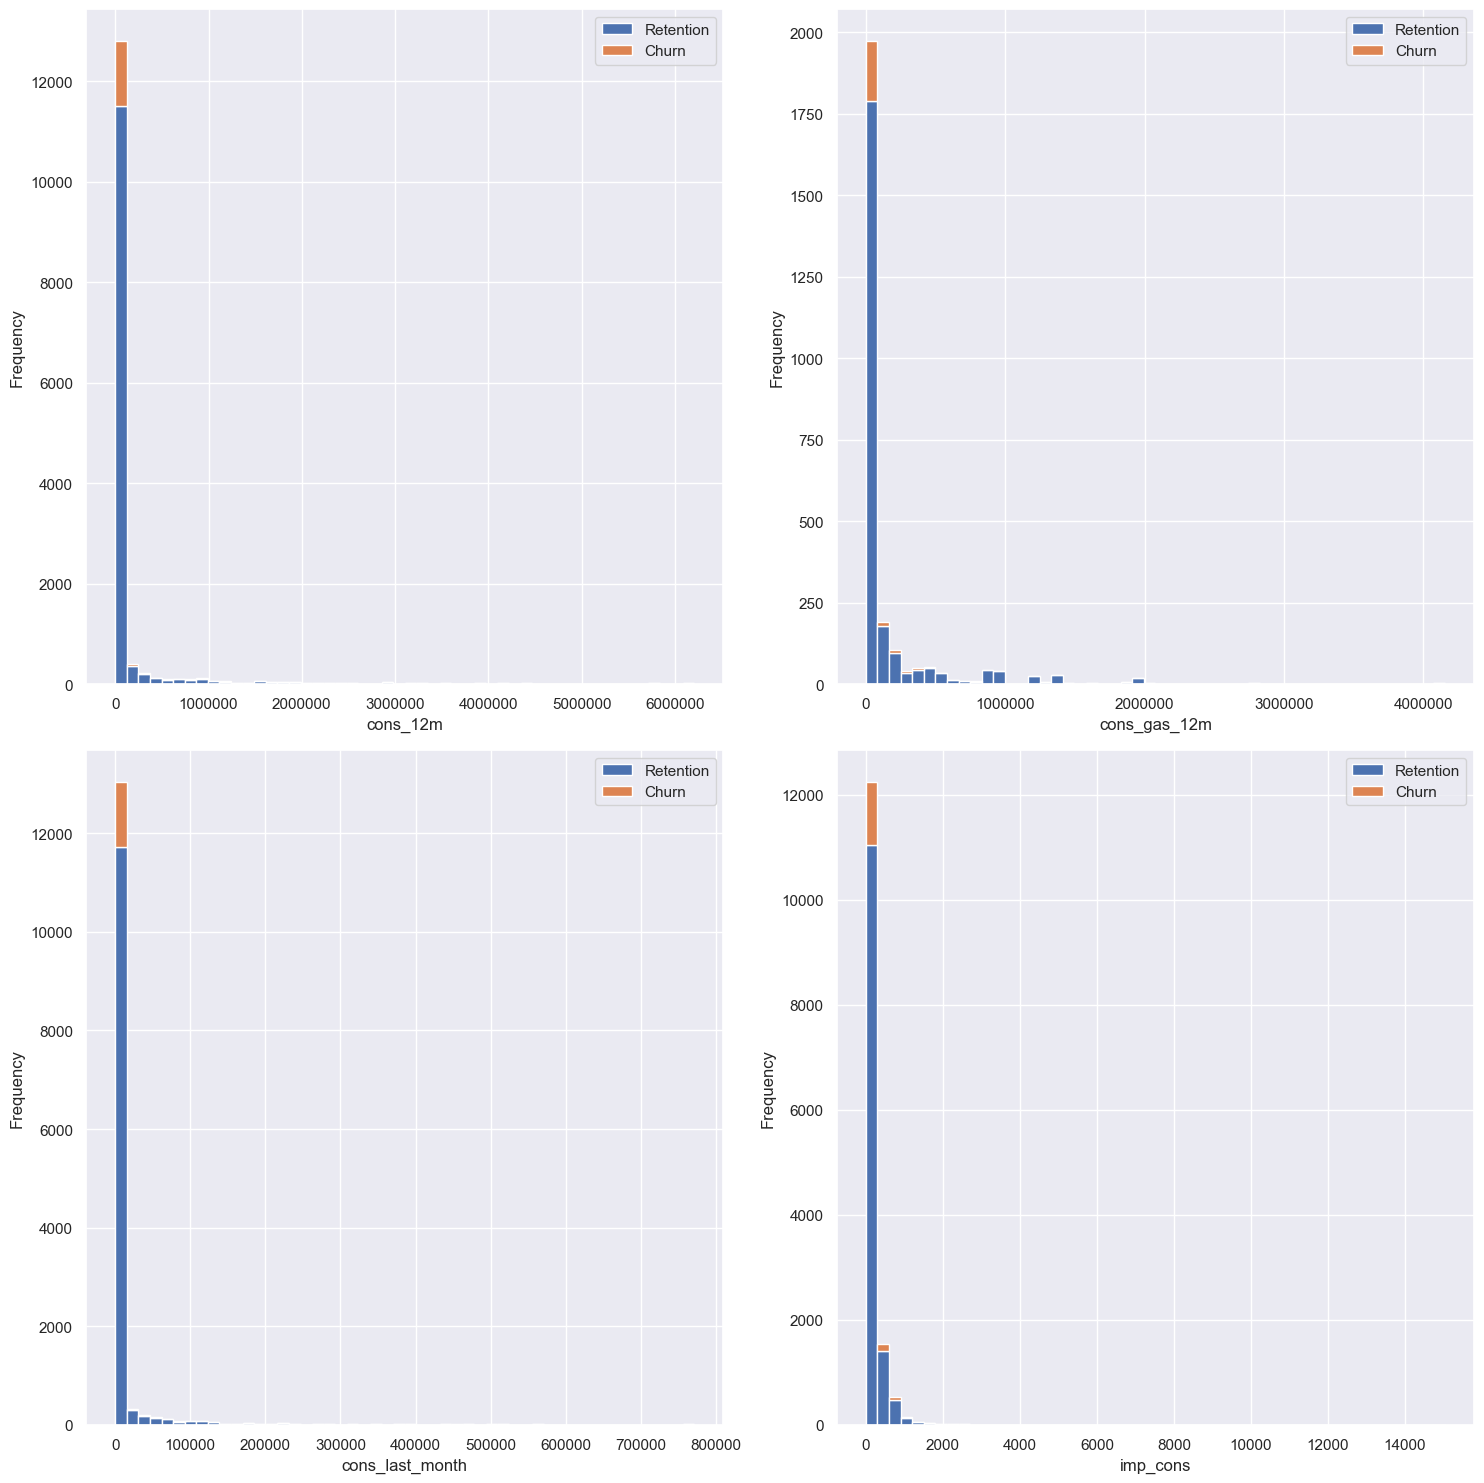

In [41]:
import matplotlib.pyplot as plt

# Create a figure with 4 subplots arranged in a 2x2 grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Plot the distribution of total consumption over 12 months
plot_distribution(consumption, 'cons_12m', axs[0, 0])

# Plot the distribution of gas consumption over 12 months (only for customers who have gas)
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[0, 1])

# Plot the distribution of last month's consumption
plot_distribution(consumption, 'cons_last_month', axs[1, 0])

# Plot the distribution of imputed consumption
plot_distribution(consumption, 'imp_cons', axs[1, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:
- Minimum
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Maximum

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

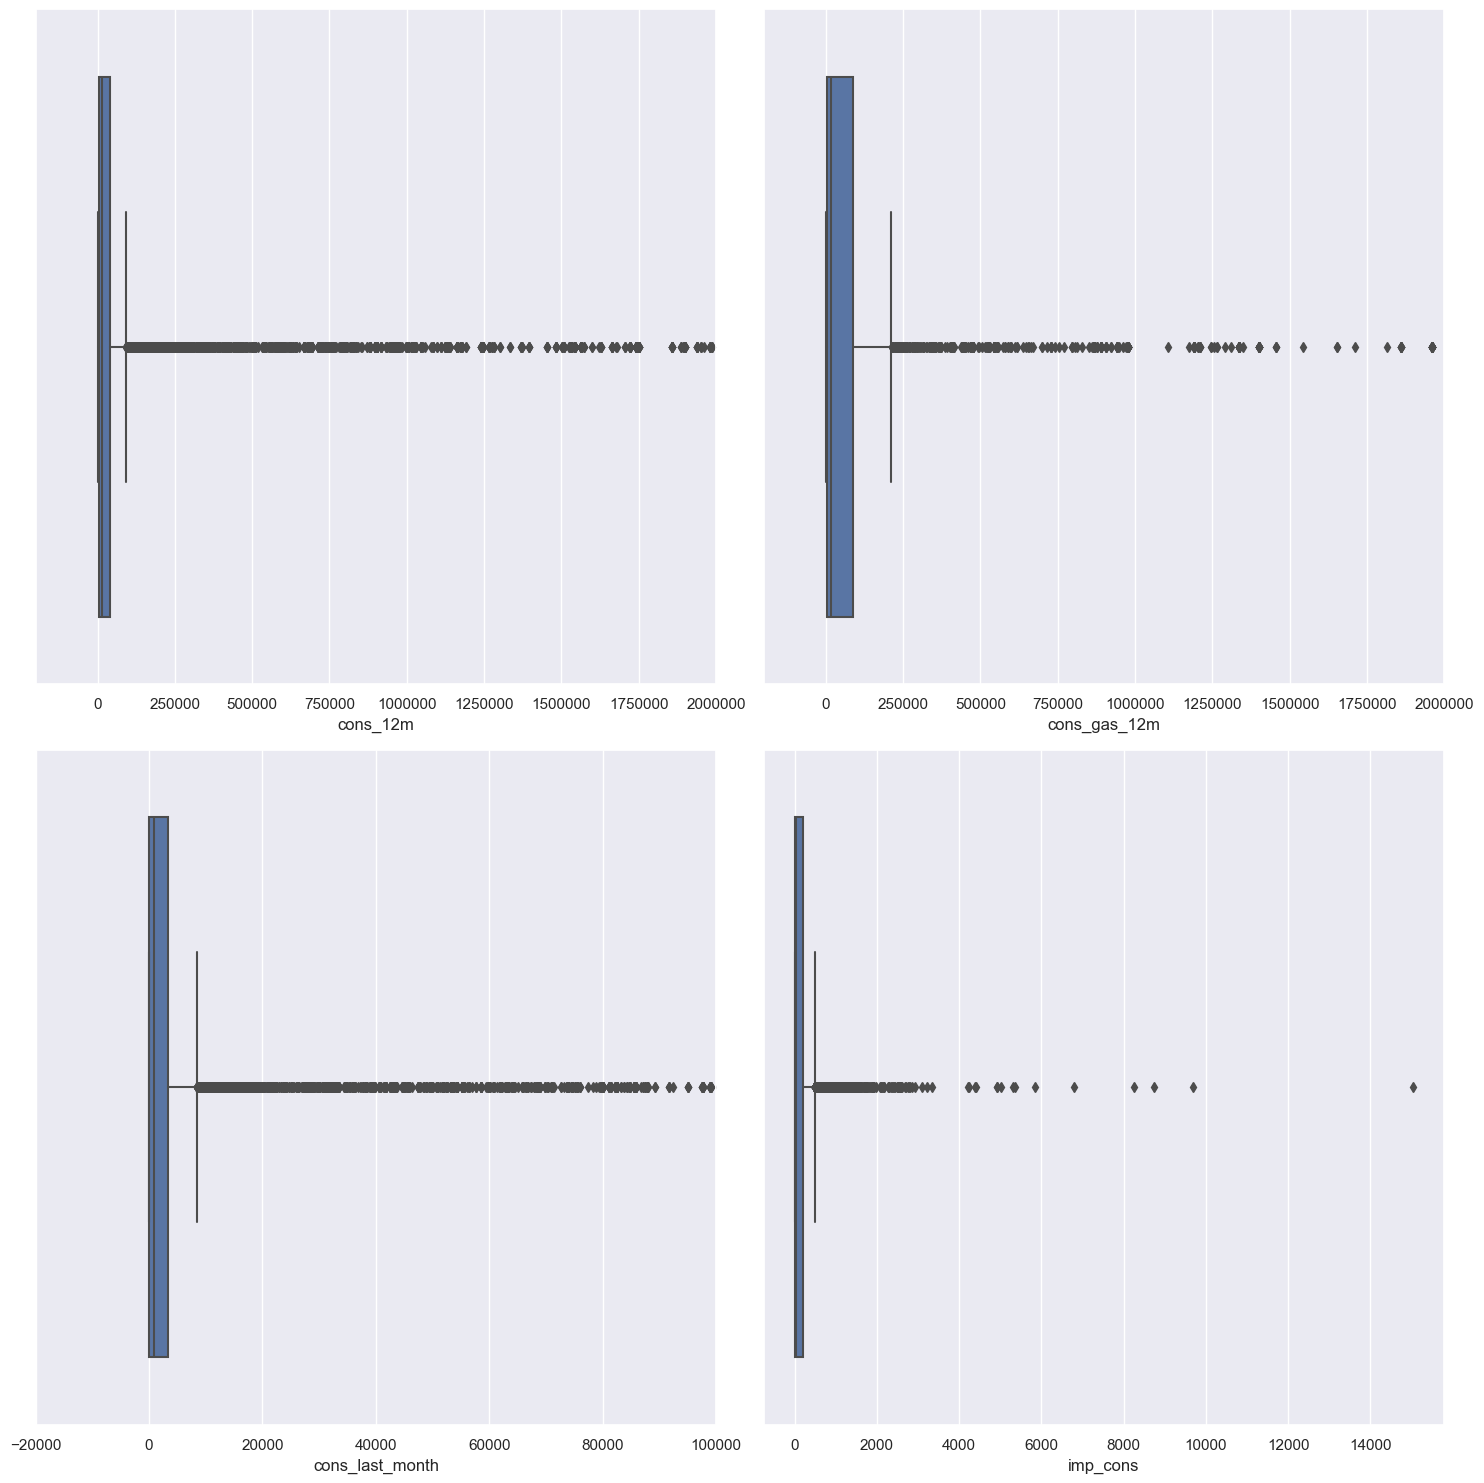

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 4 subplots arranged in a 2x2 grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Plot boxplots for different consumption metrics
sns.boxplot(x=consumption["cons_12m"], ax=axs[0, 0])  # Total consumption over 12 months
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[0, 1])  # Gas consumption (only for customers with gas)
sns.boxplot(x=consumption["cons_last_month"], ax=axs[1, 0])  # Consumption in the last month
sns.boxplot(x=consumption["imp_cons"], ax=axs[1, 1])  # Imputed consumption

# Remove scientific notation and set x-axis limits for better readability
axs[0, 0].ticklabel_format(style='plain', axis='x')
axs[0, 0].set_xlim(-200000, 2000000)

axs[0, 1].ticklabel_format(style='plain', axis='x')
axs[0, 1].set_xlim(-200000, 2000000)

axs[1, 0].ticklabel_format(style='plain', axis='x')
axs[1, 0].set_xlim(-20000, 100000)

axs[1, 1].ticklabel_format(style='plain', axis='x')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

We will deal with skewness and outliers during feature engineering in the next exercise.

### Forecast

In [44]:
# Selecting relevant columns for forecast analysis
forecast = client_df[
    [
        "id",  # Unique identifier for each company
        "forecast_cons_12m",  # Forecasted energy consumption for the next 12 months
        "forecast_cons_year",  # Forecasted energy consumption for the next year
        "forecast_discount_energy",  # Expected discount on energy consumption
        "forecast_meter_rent_12m",  # Forecasted meter rental cost for the next 12 months
        "forecast_price_energy_off_peak",  # Expected energy price during off-peak hours
        "forecast_price_energy_peak",  # Expected energy price during peak hours
        "forecast_price_pow_off_peak",  # Expected power price during off-peak hours
        "churn"  # Whether the company churned (1) or retained (0)
    ]
]

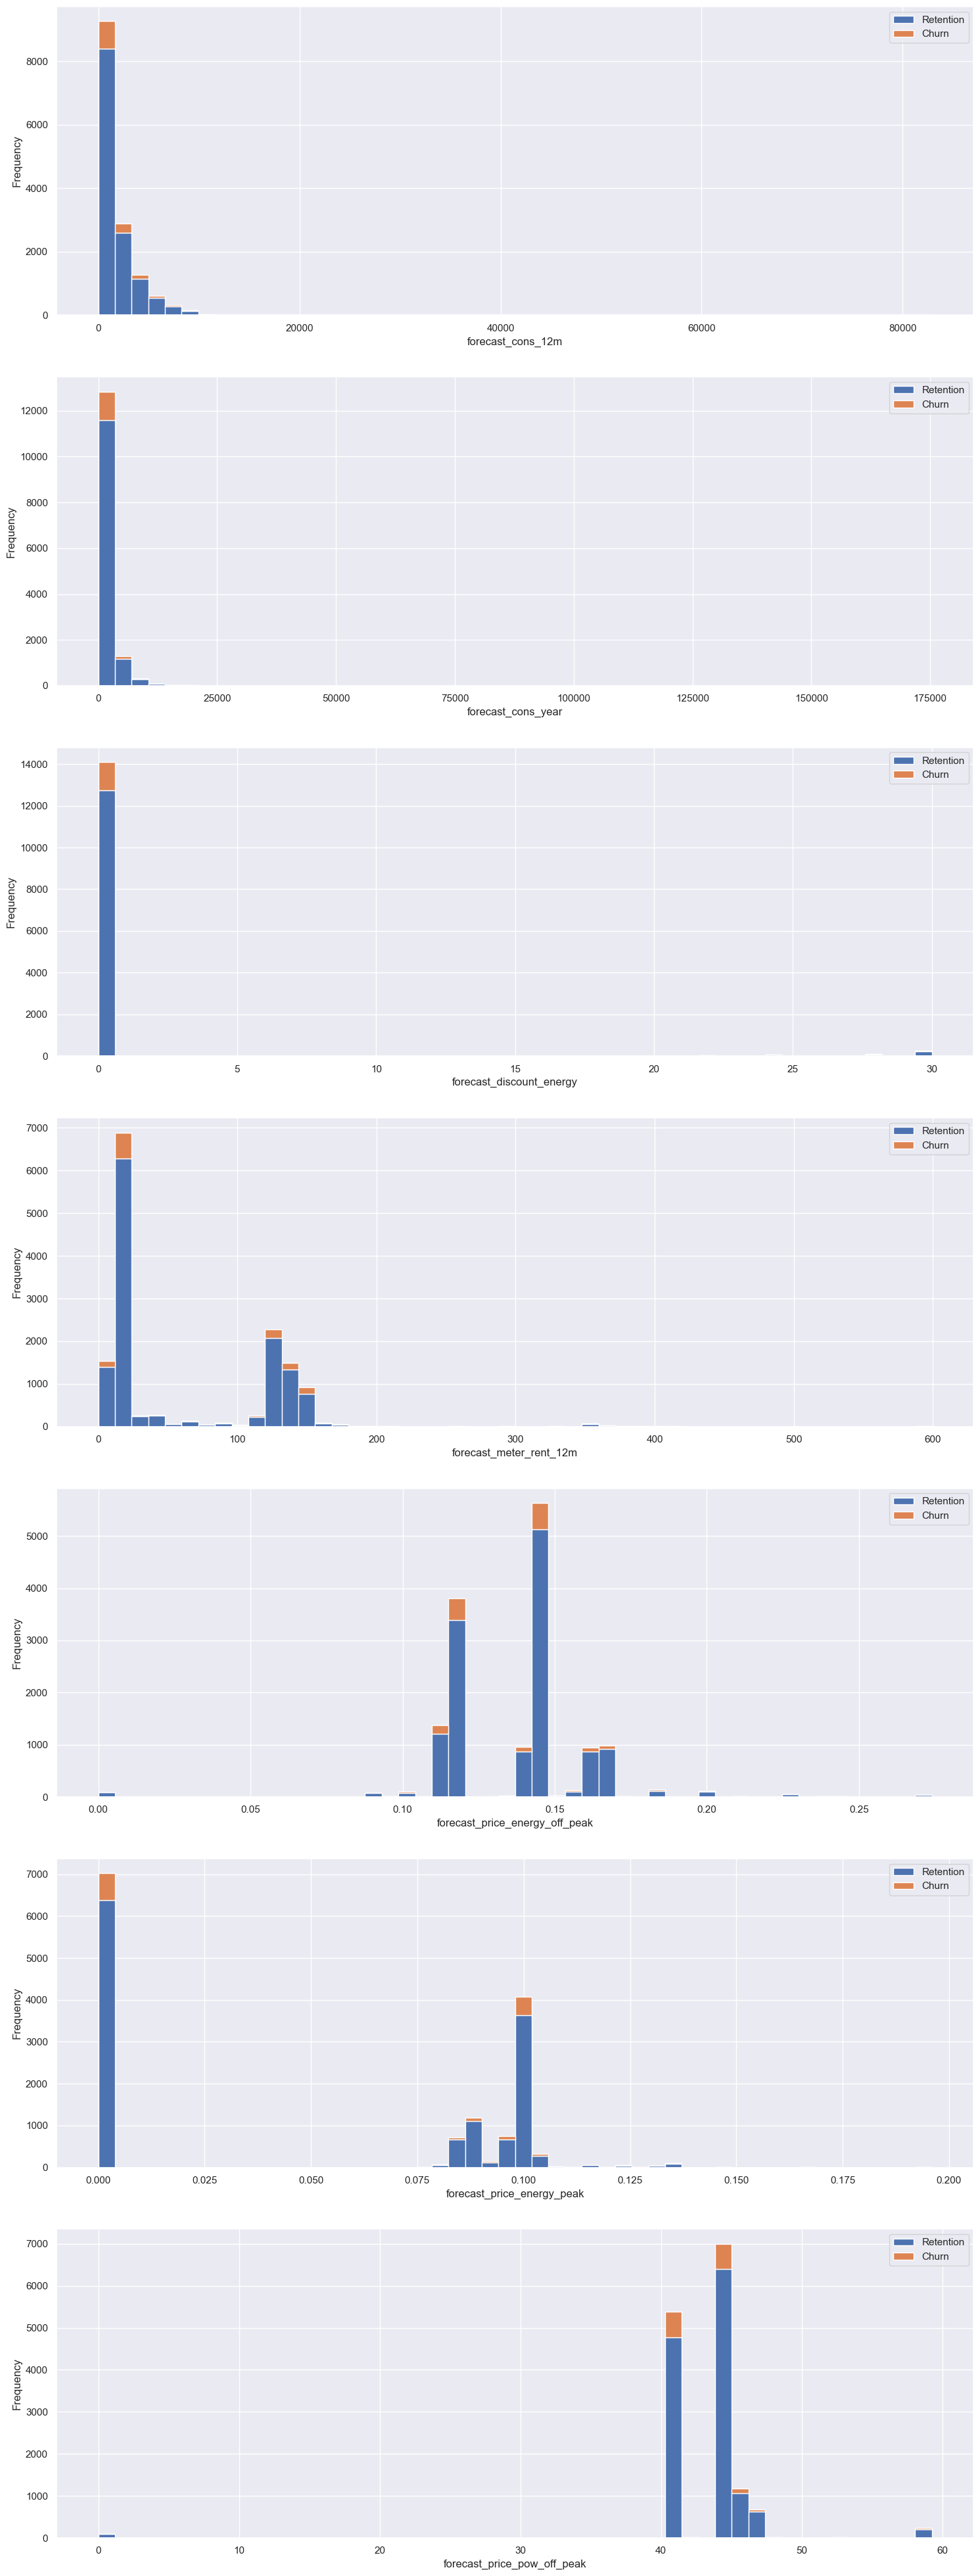

In [45]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values. We will make some transformations during the next exercise to correct for this skewness.

### Contract type

In [49]:
# Extracting relevant columns: 'id' (Company ID), 'has_gas' (Gas contract status), and 'churn' (Churn status)
contract_type = client_df[['id', 'has_gas', 'churn']]

# Grouping by 'churn' and 'has_gas' to count the number of companies in each category
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)

# Calculating the percentage of churned and retained companies for each gas contract status
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100)

# Sorting the results by the churned customers (1), in descending order
contract_percentage = contract_percentage.sort_values(by=[1], ascending=False)

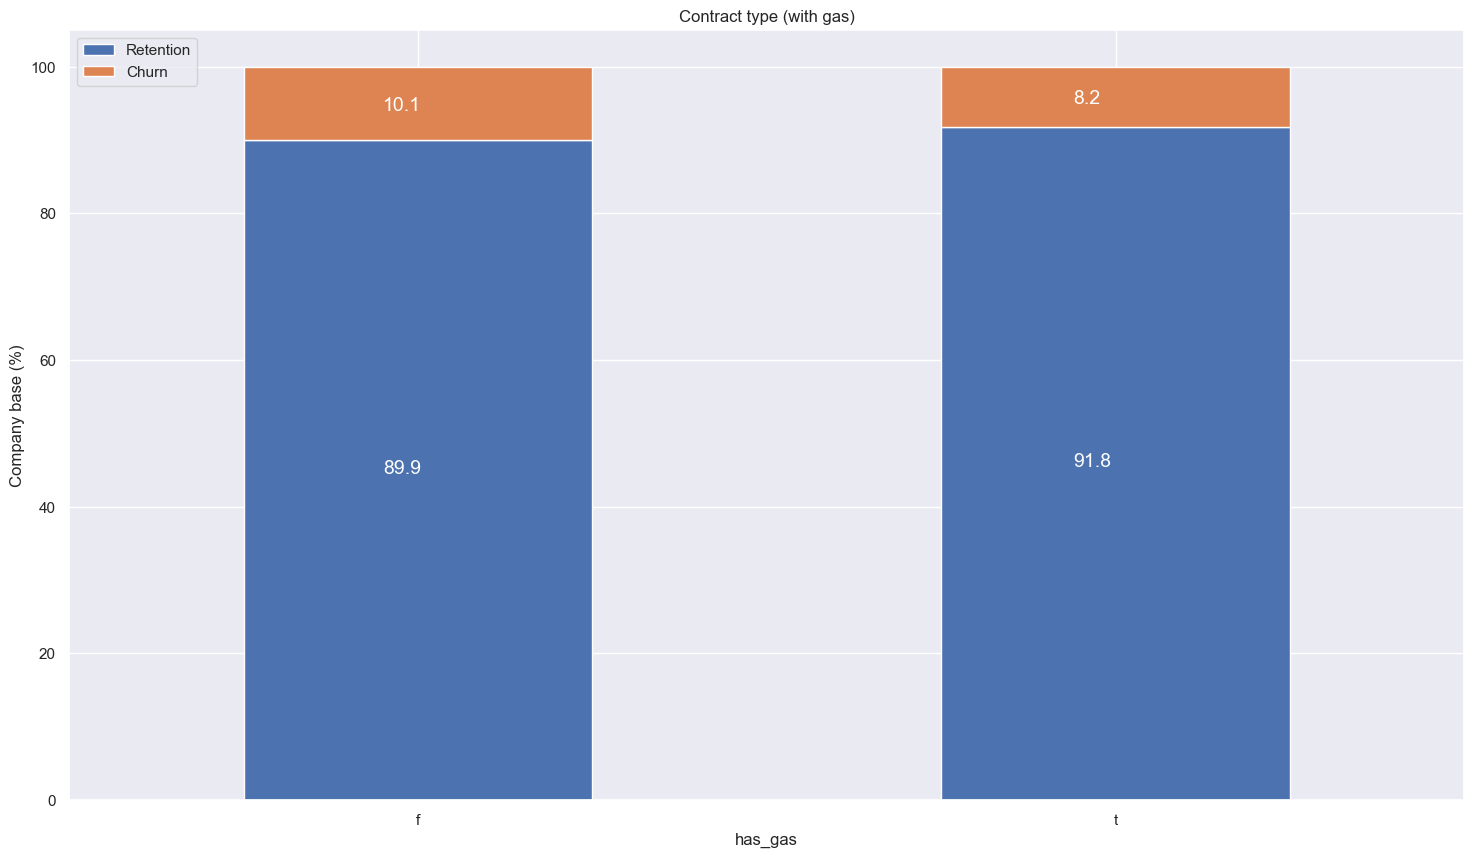

In [50]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas)')

### Margins

In [55]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

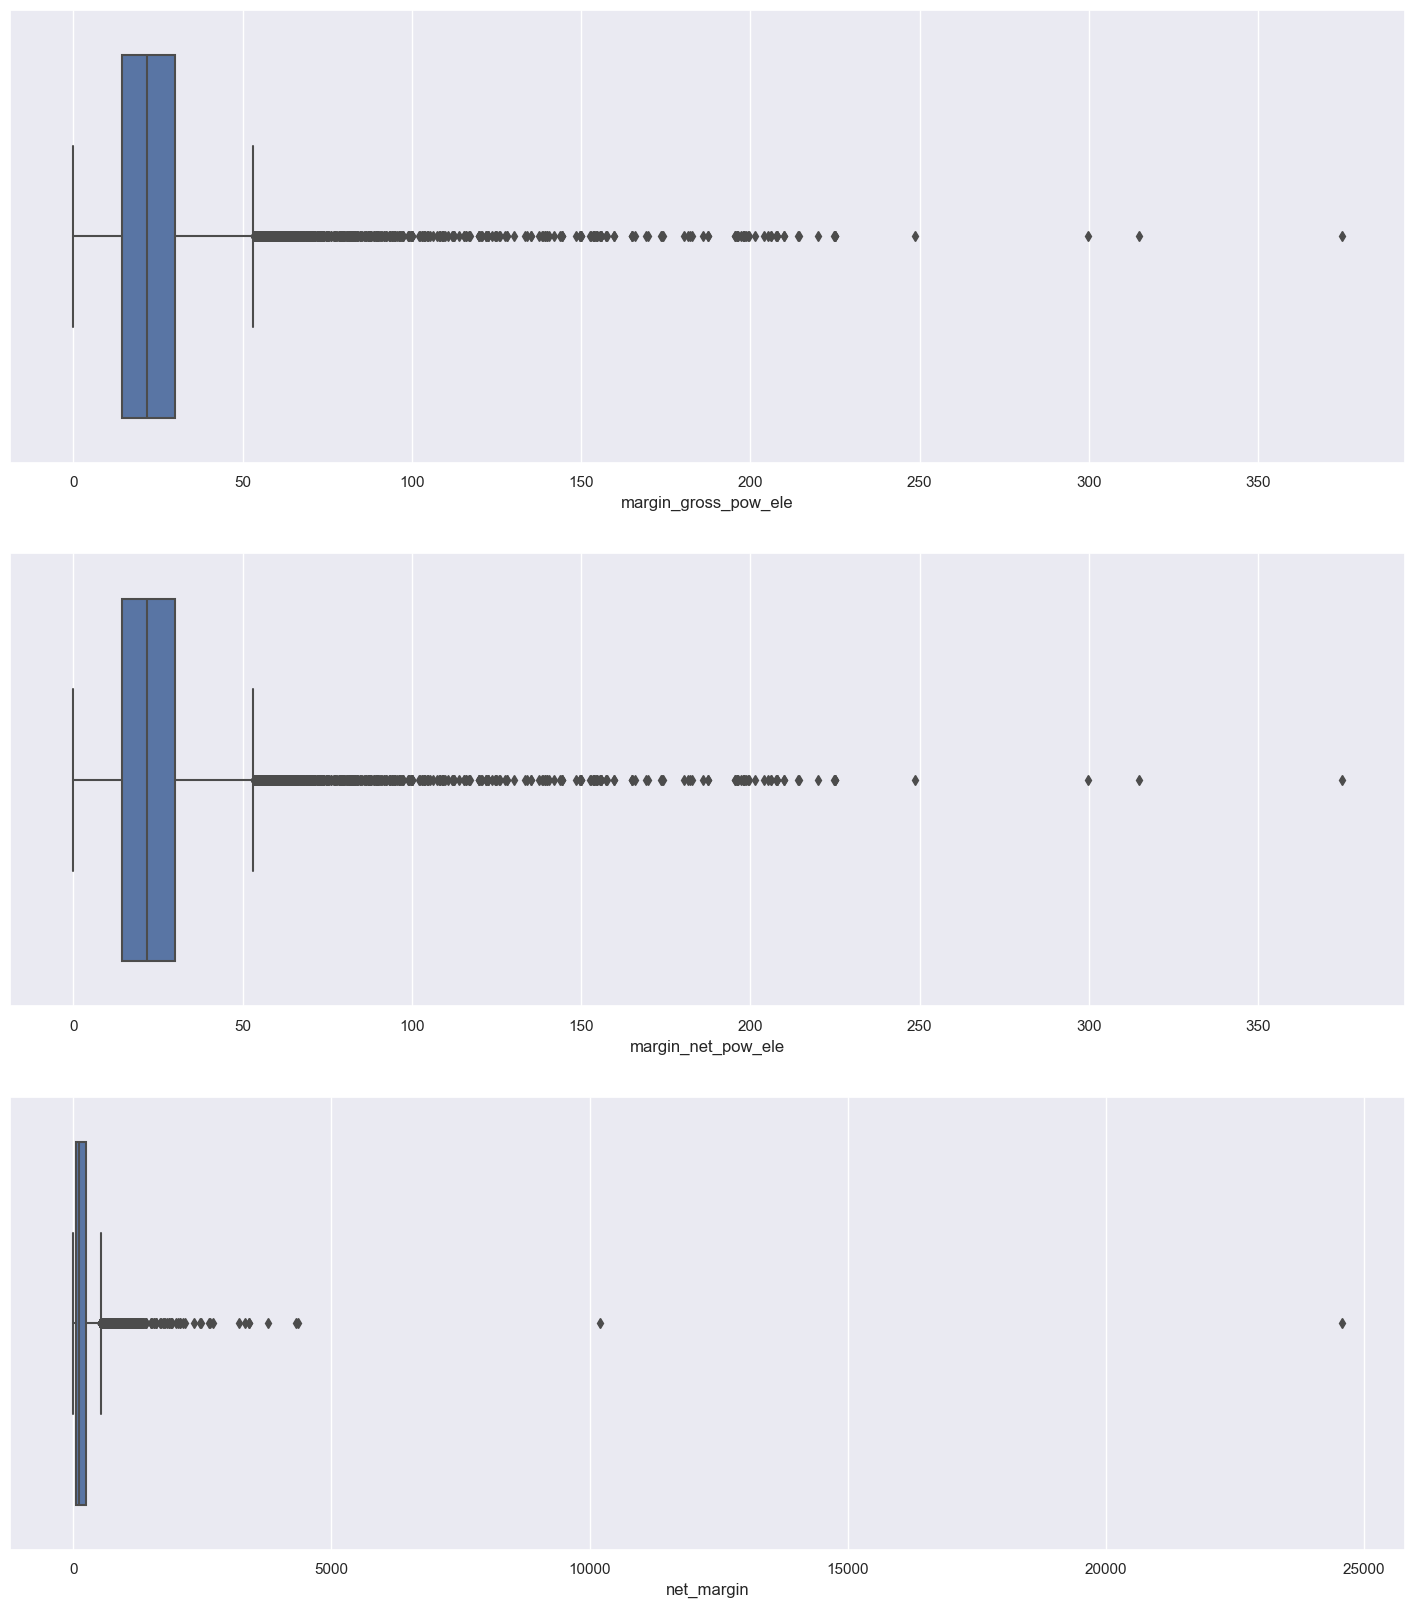

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Create a figure with 3 subplots arranged in a single column
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot boxplots for different margin-related variables
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0])  # Gross margin on power electricity
sns.boxplot(x=margin["margin_net_pow_ele"], ax=axs[1])    # Net margin on power electricity
sns.boxplot(x=margin["net_margin"], ax=axs[2])            # Overall net margin

# Remove scientific notation by setting the ScalarFormatter explicitly
for ax in axs:
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())  # Use ScalarFormatter
    ax.ticklabel_format(style="plain", axis="x", useOffset=False)

# Display the plots
plt.show()

We can see some outliers here as well which we will deal with in the next exercise.

### Subscribed power

In [26]:
power = client_df[['id', 'pow_max', 'churn']]

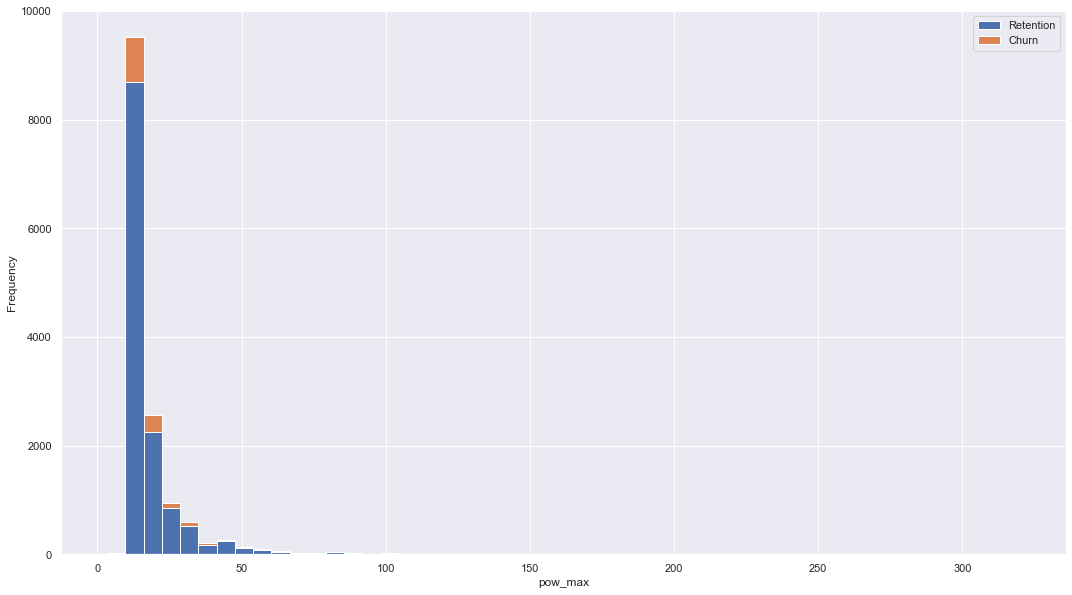

In [27]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### Other columns

In [62]:
# Extract relevant columns from the client dataset
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

# Group by the number of active products and churn status, then count the number of companies
products = others.groupby([others["nb_prod_act"], others["churn"]])["id"].count().unstack(level=1)

# Convert raw counts into percentages and sort by churn percentage in descending order
products_percentage = (products.div(products.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

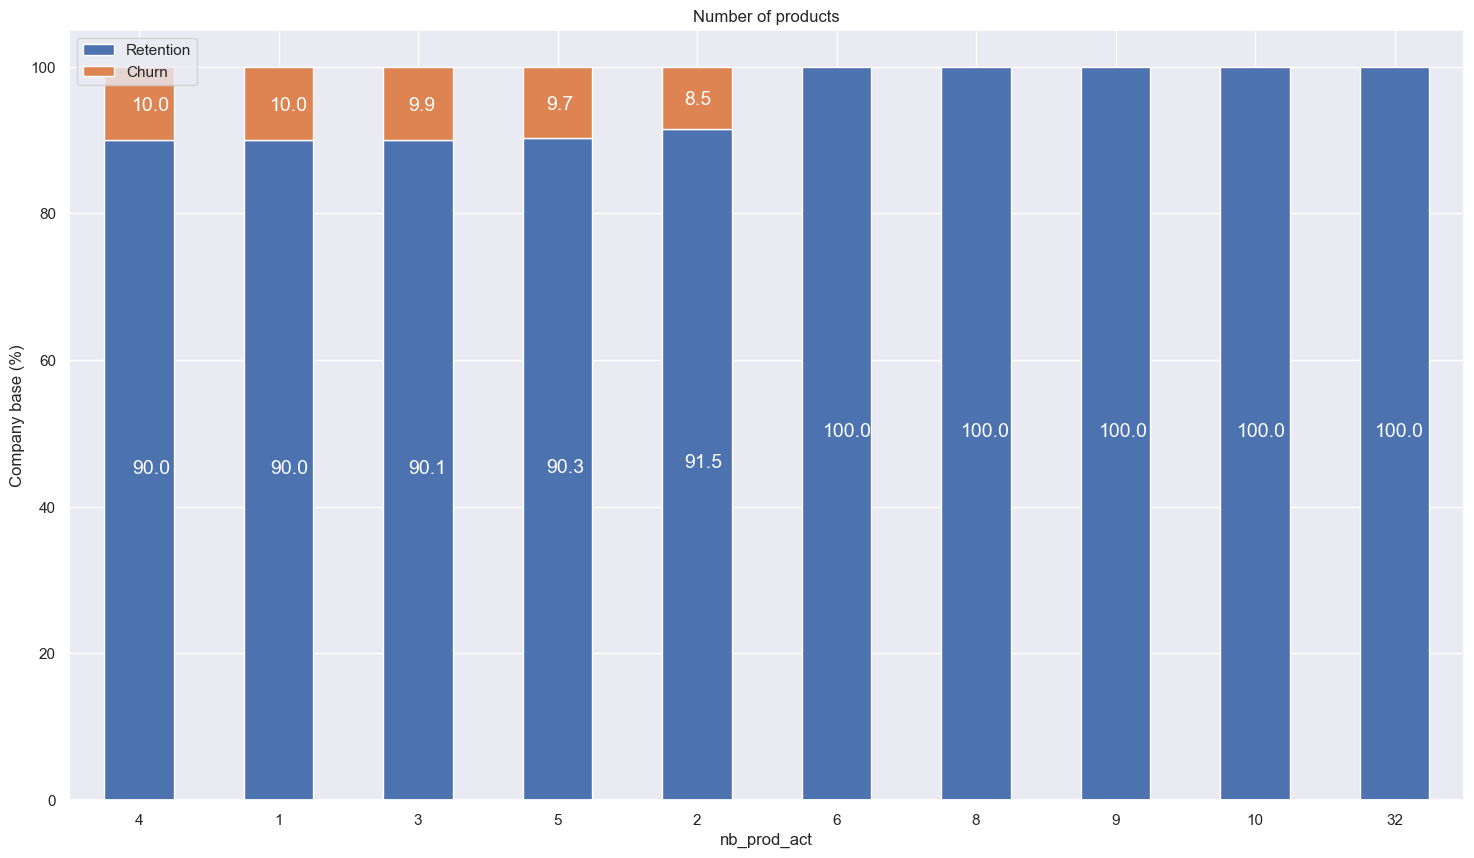

In [63]:
plot_stacked_bars(products_percentage, "Number of products")

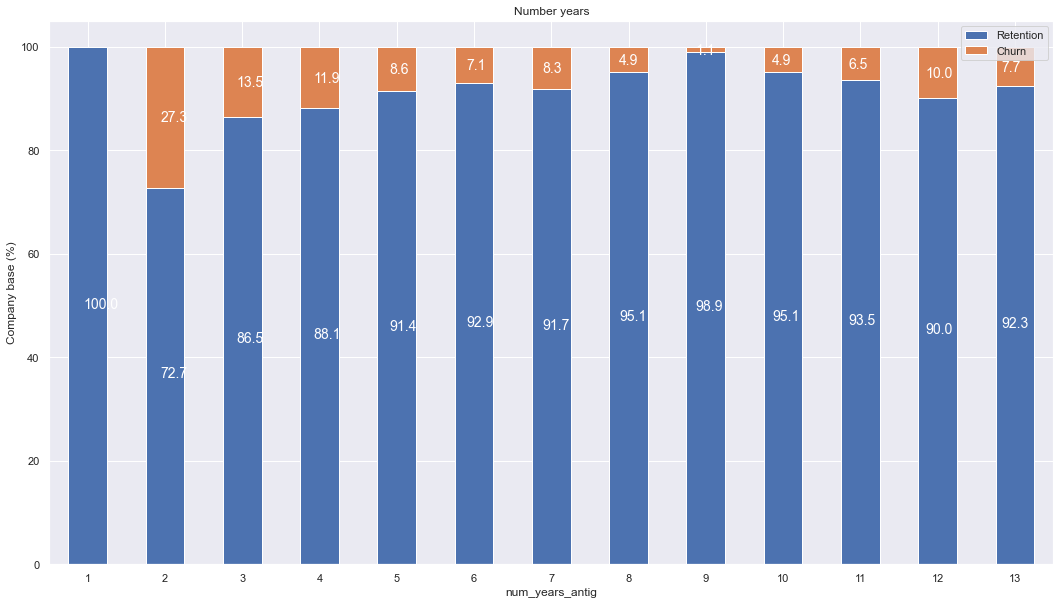

In [30]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

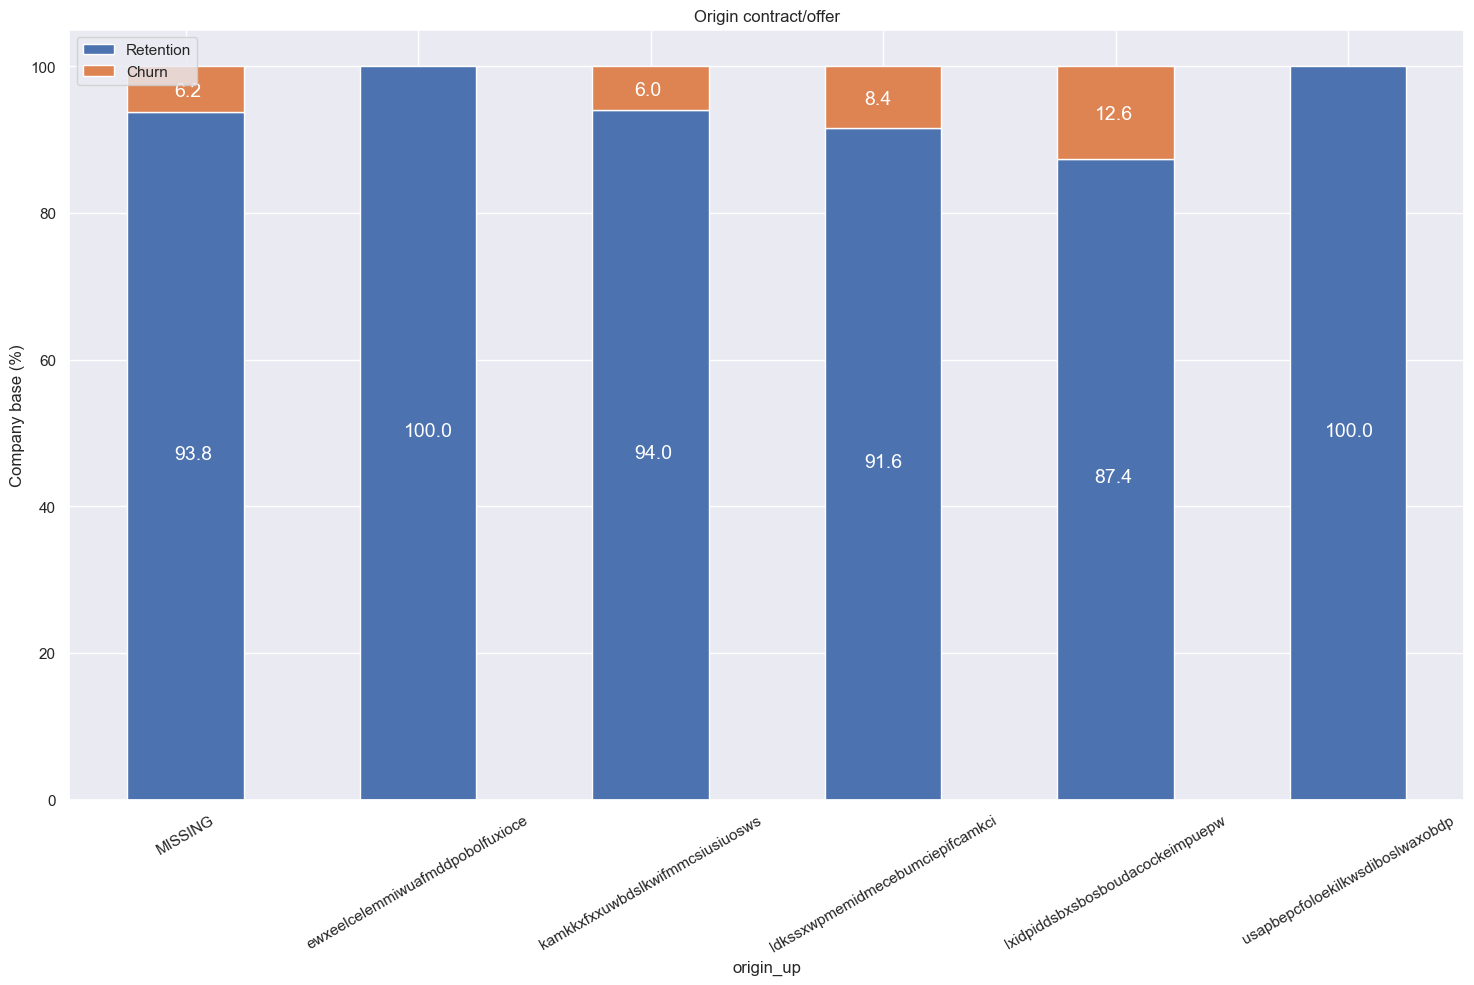

In [64]:
# Group by contract origin and churn status, then count the number of companies
origin = others.groupby([others["origin_up"], others["churn"]])["id"].count().unstack(level=1)

# Convert raw counts into percentages for better comparison
origin_percentage = (origin.div(origin.sum(axis=1), axis=0) * 100)

# Plot stacked bar chart with slanted x-axis labels
plot_stacked_bars(origin_percentage, "Origin contract/offer", rot_=30)  # Rotates x-axis labels by 30 degrees